In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ["TATAMOTORS.NS", "INFY", "TECHM.NS", "HDB", "RELIANCE.NS"]

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data using yfinance directly
for stock in tech_list:
    globals()[stock.replace('.', '').replace('-', '')] = yf.download(stock, start=start, end=end)

# Assign company names
company_list = [globals()[stock.replace('.', '').replace('-', '')] for stock in tech_list]
company_name = ["TATAMOTORS.NS", "INFY", "TECHM.NS", "HDB", "RELIANCE.NS"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate all the data into a single DataFrame
df = pd.concat(company_list, axis=0)

# Display the last 10 rows
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-10-09,2795.050049,2801.949951,2745.000000,2749.199951,2749.199951,7155305,RELIANCE.NS
2024-10-10,2760.050049,2772.000000,2738.850098,2742.100098,2742.100098,11179323,RELIANCE.NS
2024-10-11,2740.000000,2766.550049,2737.649902,2744.199951,2744.199951,3990061,RELIANCE.NS
2024-10-14,2758.899902,2760.149902,2736.500000,2745.050049,2745.050049,6110716,RELIANCE.NS
2024-10-15,2717.050049,2743.399902,2681.399902,2688.050049,2688.050049,16881397,RELIANCE.NS
2024-10-16,2680.000000,2728.000000,2675.250000,2708.149902,2708.149902,10017219,RELIANCE.NS
2024-10-17,2731.399902,2736.899902,2704.100098,2712.850098,2712.850098,7771830,RELIANCE.NS
2024-10-18,2704.350098,2736.850098,2682.649902,2718.600098,2718.600098,6041226,RELIANCE.NS
2024-10-21,2734.250000,2748.000000,2715.449951,2738.399902,2738.399902,7033704,RELIANCE.NS


In [6]:
# Summary Stats
INFY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,19.357778,19.499087,19.232500,19.371825,19.153283,8.681224e+06
std,2.152642,2.180537,2.147757,2.169475,2.286515,4.545533e+06
min,16.260000,16.410000,16.040001,16.320000,15.995921,2.743400e+06
25%,17.465000,17.602500,17.370001,17.532501,17.184345,5.758225e+06
50%,18.790000,18.965000,18.660000,18.835000,18.625000,7.628500e+06
75%,21.295001,21.435000,21.157499,21.302499,21.302499,1.048462e+07
max,23.320000,23.480000,23.209999,23.360001,23.360001,4.217610e+07


In [7]:
# General info
INFY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-10-23 to 2024-10-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


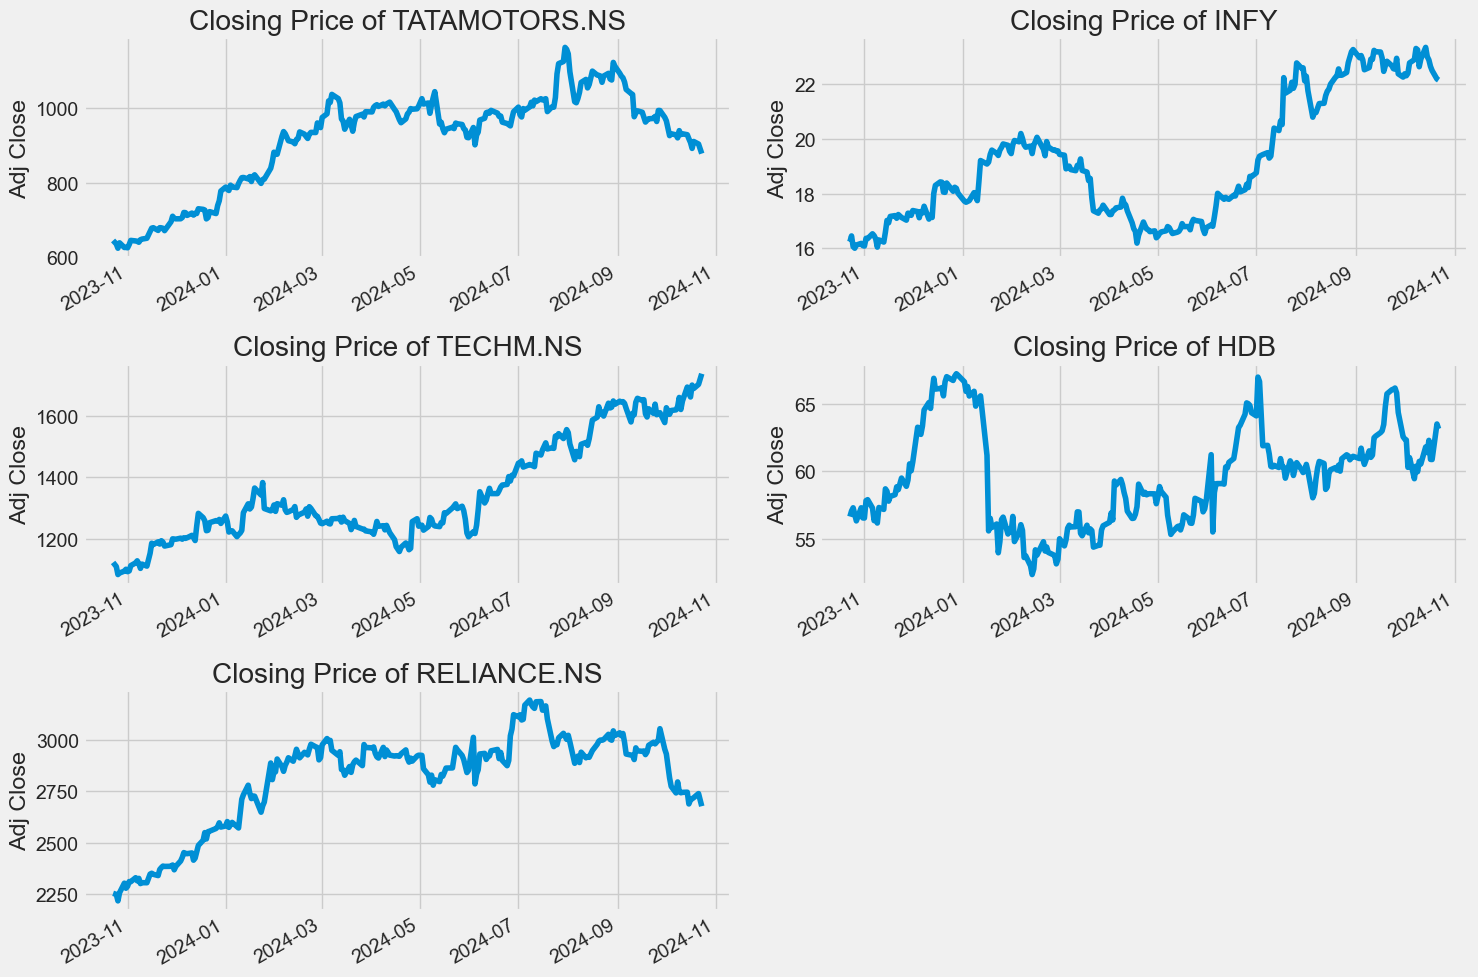

In [9]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Use a 3x2 grid to fit 5 plots
for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)  # Adjust to 3 rows, 2 columns
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()
plt.show()


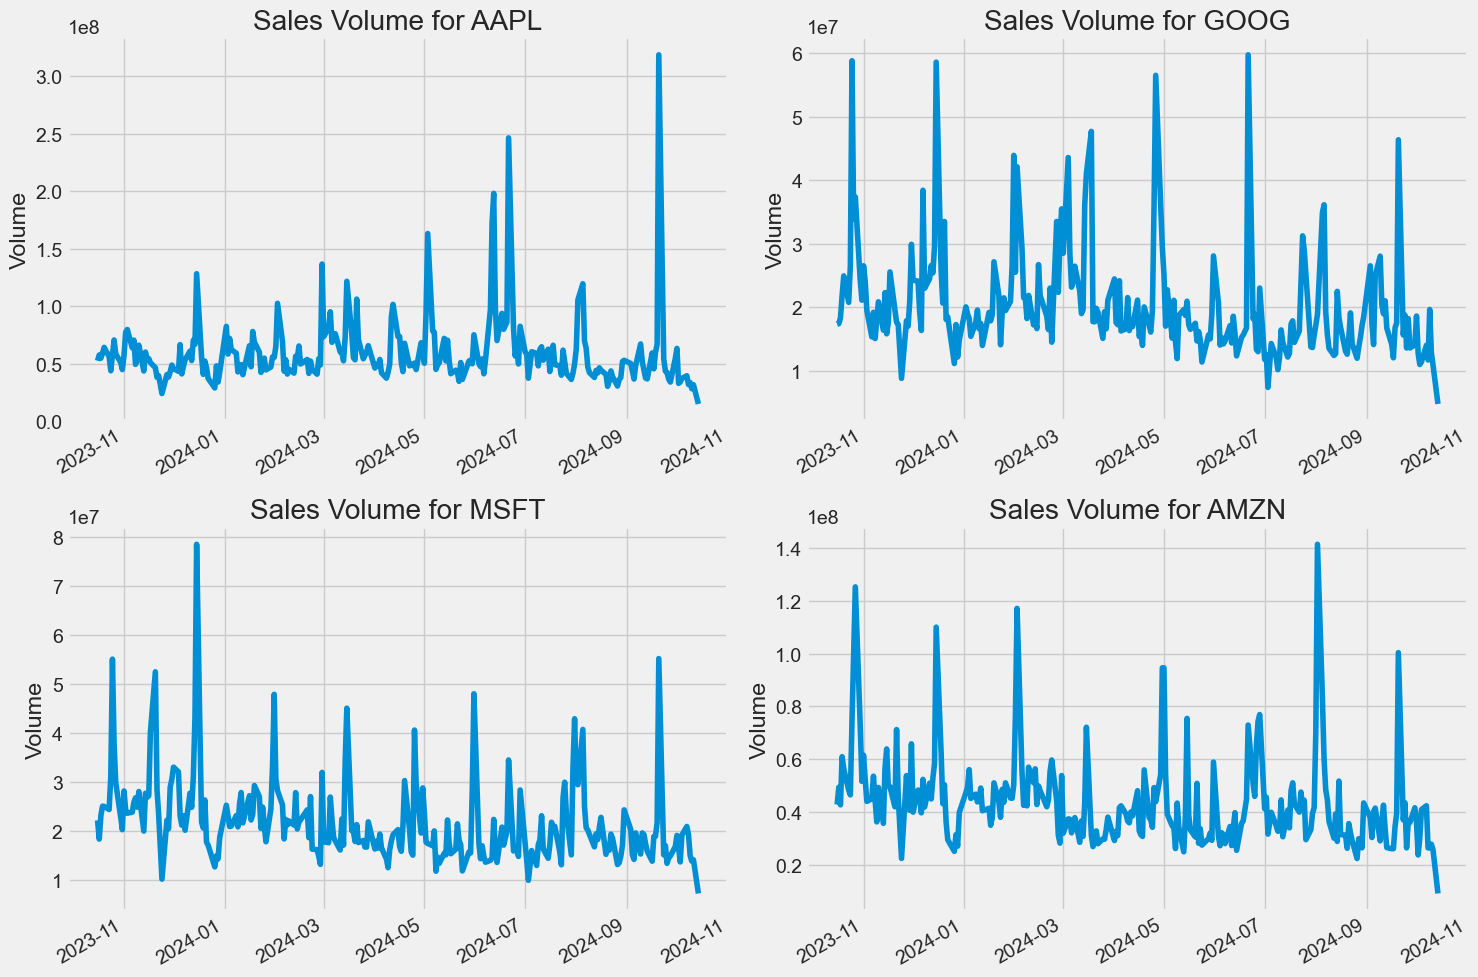

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

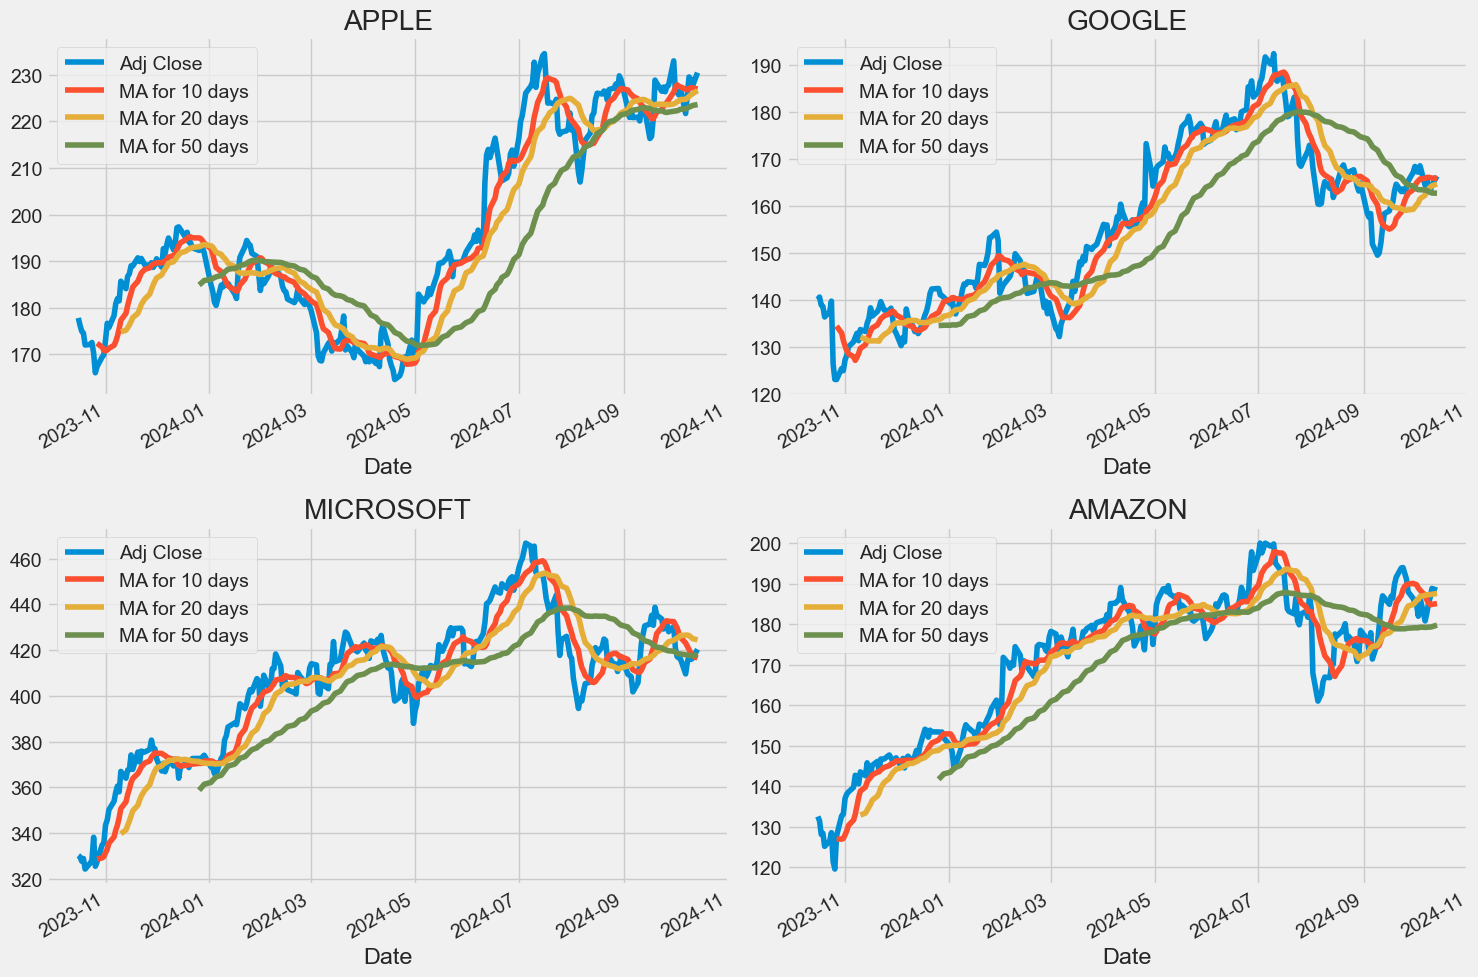

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

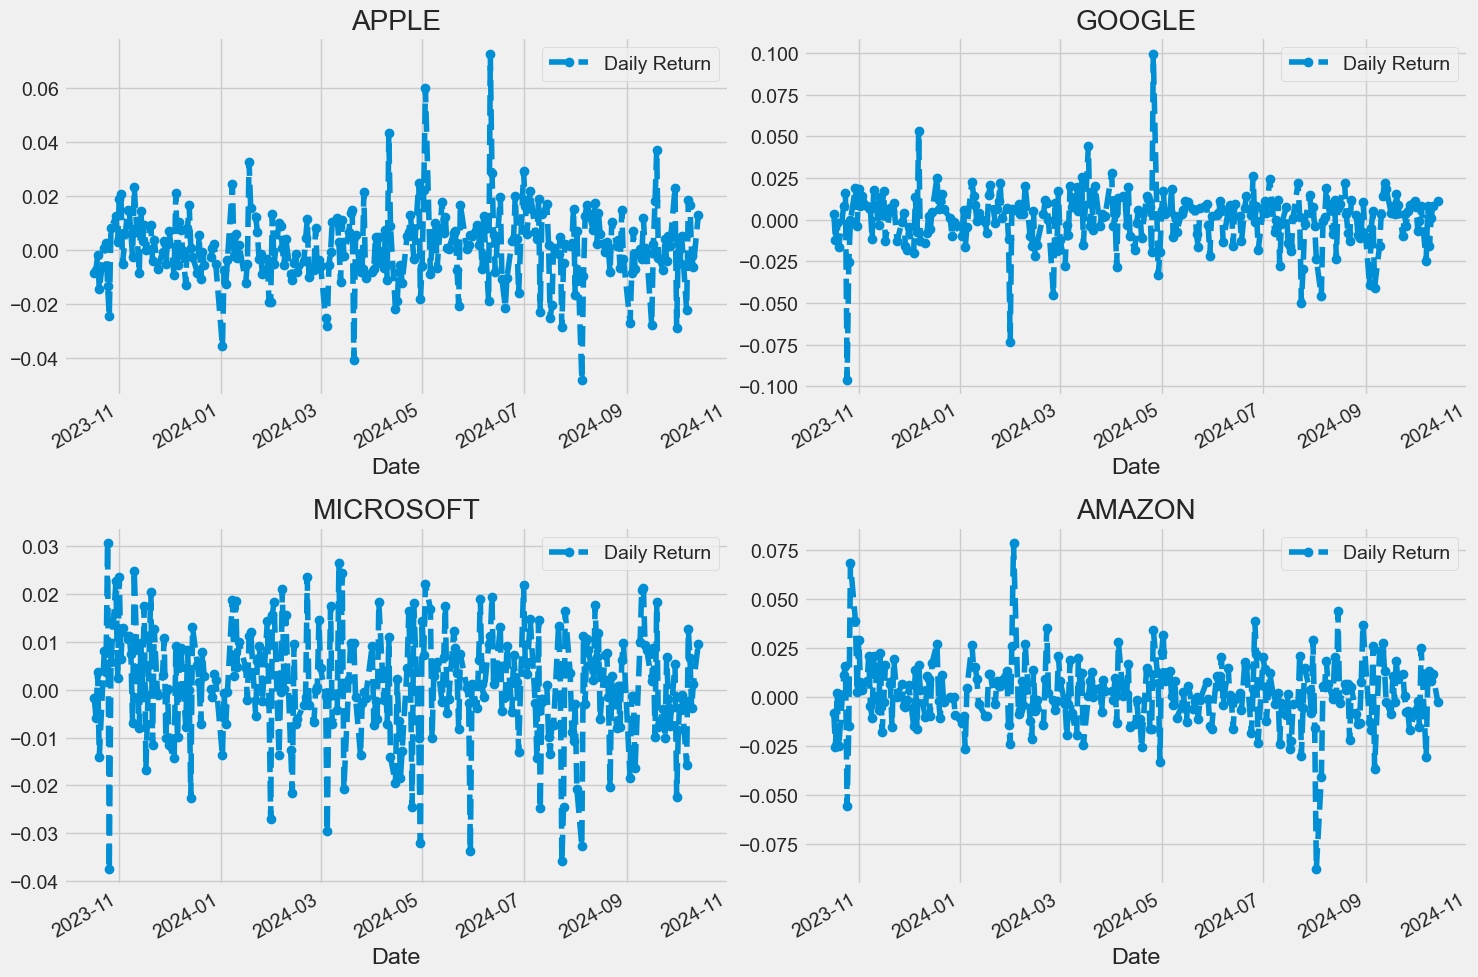

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

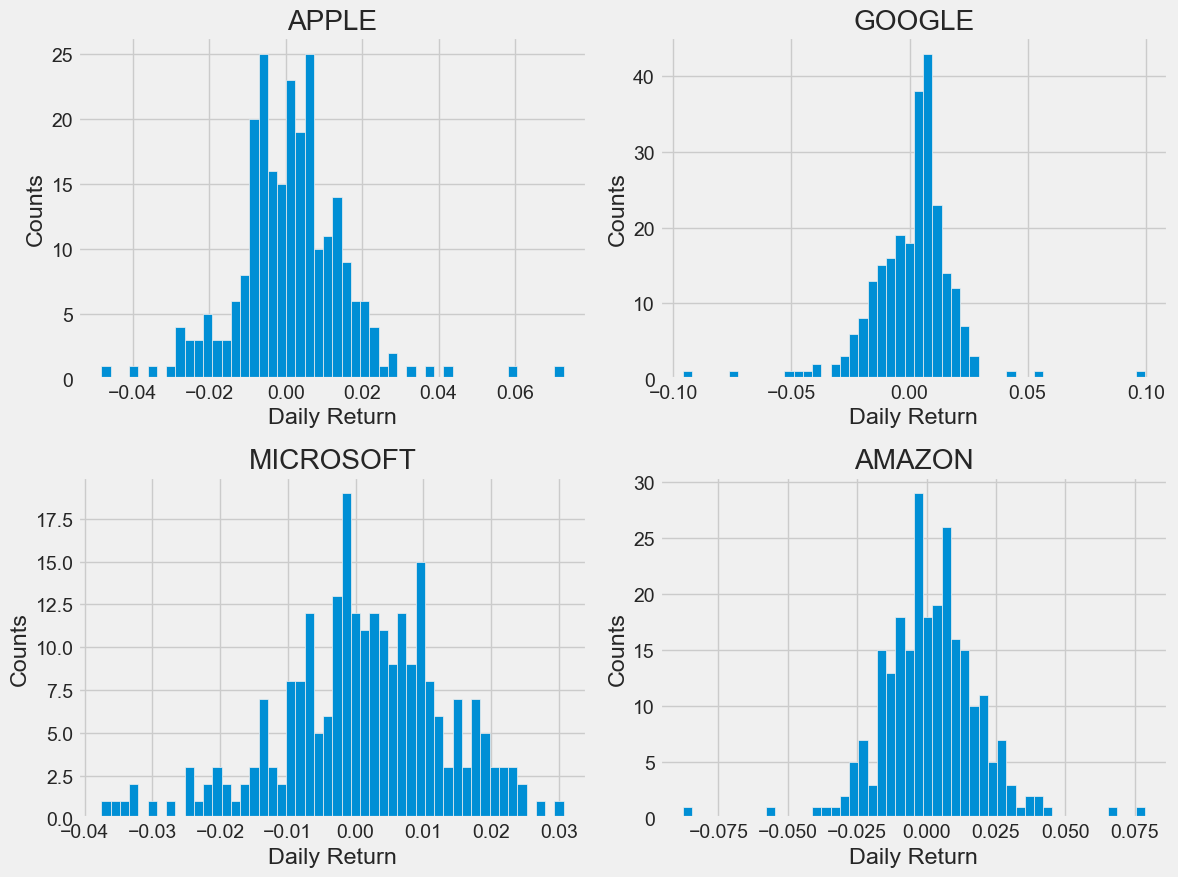

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [10]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Define the tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set the start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download the adjusted closing prices for all tech stocks
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Calculate the daily returns
tech_rets = closing_df.pct_change()

# Display the first few rows of the returns
tech_rets.head()


[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-16,NaN,NaN,NaN,NaN
2023-10-17,-0.008785,-0.008148,0.003559,-0.001744
2023-10-18,-0.007395,-0.025405,-0.012129,-0.005872
2023-10-19,-0.002161,0.002107,-0.002154,0.003665
2023-10-20,-0.014704,-0.025156,-0.016117,-0.014035


In [11]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define the tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set the start and end dates
end = datetime.now()
start = end - timedelta(days=3)  # Get data for the last 3 days

# Download the adjusted closing prices for all tech stocks
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Calculate the daily returns
tech_rets = closing_df.pct_change()

# Display all rows of the returns
print(tech_rets)

# Display the date range
print(f"\nData range: {start.strftime('%d/%m/%Y')} to {end.strftime('%d/%m/%Y')}")

[*********************100%%**********************]  4 of 4 completed

Ticker      AAPL  AMZN  GOOG  MSFT
Date                              
2024-10-14   NaN   NaN   NaN   NaN

Data range: 11/10/2024 to 14/10/2024


In [12]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Define the tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set the start and end dates
start = datetime(2023, 10, 14)  # Year, Month, Day
end = datetime(2023, 10, 16)    # Year, Month, Day

# Download the adjusted closing prices for all tech stocks
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Calculate the daily returns
tech_rets = closing_df.pct_change()

# Display all rows of the returns
print(tech_rets)

# Display the date range
print(f"\nData range: {start.strftime('%d/%m/%Y')} to {end.strftime('%d/%m/%Y')}")

# Check if data is empty
if closing_df.empty:
    print("\nNo data available for the specified date range. This could be due to weekends, holidays, or requesting future dates.")
else:
    print(f"\nNumber of trading days in the range: {len(closing_df)}")

[*********************100%%**********************]  4 of 4 completed

4 Failed downloads:
['GOOG', 'AMZN', 'MSFT', 'AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-14 00:00:00 -> 2023-10-16 00:00:00)')


ValueError: attempt to get argmax of an empty sequence

In [14]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define the tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set the start and end dates
start = datetime(2023, 10, 13)  # Year, Month, Day
end = datetime(2023, 10, 15)    # Year, Month, Day

# Download the adjusted closing prices for all tech stocks
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Display the date range
print(f"\nRequested data range: {start.strftime('%d/%m/%Y')} to {end.strftime('%d/%m/%Y')}")

# Check if data is empty
if closing_df.empty:
    print("\nNo data available for the specified date range. This could be due to weekends, holidays, or requesting future dates.")
    
    # Try to get the nearest available data
    while closing_df.empty and start > datetime(2000, 1, 1):  # Arbitrary past date
        start -= timedelta(days=1)
        end -= timedelta(days=1)
        closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']
    
    if not closing_df.empty:
        print(f"\nNearest available data: {start.strftime('%d/%m/%Y')} to {end.strftime('%d/%m/%Y')}")
        print(closing_df)
        
        # Calculate the daily returns
        tech_rets = closing_df.pct_change()
        print("\nDaily returns:")
        print(tech_rets)
    else:
        print("\nUnable to find recent data. Please check the stock symbols and try a different date range.")
else:
    print(f"\nData found for the specified range:")
    print(closing_df)
    
    # Calculate the daily returns
    tech_rets = closing_df.pct_change()
    print("\nDaily returns:")
    print(tech_rets)

print(f"\nNumber of trading days in the range: {len(closing_df)}")

[*********************100%%**********************]  4 of 4 completed


Requested data range: 13/10/2023 to 15/10/2023

Data found for the specified range:
Ticker            AAPL        AMZN        GOOG        MSFT
Date                                                      
2023-10-13  177.939468  129.789993  138.240509  325.288391

Daily returns:
Ticker      AAPL  AMZN  GOOG  MSFT
Date                              
2023-10-13   NaN   NaN   NaN   NaN

Number of trading days in the range: 1


In [33]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define the tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set the initial start and end dates
start = datetime(2024, 10, 13)  # Year, Month, Day
end = datetime(2024, 10, 15)    # Year, Month, Day

# Function to download data and extend end date if necessary
def get_stock_data(start_date, end_date, min_trading_days=3):
    while True:
        closing_df = yf.download(tech_list, start=start_date, end=end_date)['Adj Close']
        if len(closing_df) >= min_trading_days:
            return closing_df, start_date, end_date
        end_date += timedelta(days=1)

# Get the data
closing_df, actual_start, actual_end = get_stock_data(start, end)

print(f"\nRequested data range: {start.strftime('%d/%m/%Y')} to {end.strftime('%d/%m/%Y')}")
print(f"Actual data range: {actual_start.strftime('%d/%m/%Y')} to {actual_end.strftime('%d/%m/%Y')}")

print("\nClosing prices:")
print(closing_df)

# Calculate the daily returns
tech_rets = closing_df.pct_change()
print("\nDaily returns:")
print(tech_rets)

print(f"\nNumber of trading days in the range: {len(closing_df)}")

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  4 of 4 completed
[*********************100%%*******

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Define the tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set the initial start and end dates
start = datetime(2024, 10, 13)  # Year, Month, Day
end = datetime(2024, 10, 15)    # Year, Month, Day

# Function to download historical data and make predictions
def get_stock_data(start_date, end_date, min_trading_days=3):
    # Get historical data (1 year before the start date)
    historical_start = start_date - timedelta(days=365)
    historical_end = datetime.now()
    
    historical_data = yf.download(tech_list, start=historical_start, end=historical_end)['Adj Close']
    
    # If the requested start date is in the future, we need to make predictions
    if start_date > historical_end:
        predictions = {}
        for stock in tech_list:
            stock_data = historical_data[stock].values.reshape(-1, 1)
            
            # Prepare data for LSTM model
            scaler = MinMaxScaler(feature_range=(0, 1))
            scaled_data = scaler.fit_transform(stock_data)
            
            x_train, y_train = [], []
            for i in range(60, len(scaled_data)):
                x_train.append(scaled_data[i-60:i, 0])
                y_train.append(scaled_data[i, 0])
            x_train, y_train = np.array(x_train), np.array(y_train)
            x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
            
            # Create and train the LSTM model
            model = Sequential()
            model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
            model.add(LSTM(units=50))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=0)
            
            # Make predictions
            days_to_predict = (end_date - historical_end).days
            last_60_days = scaled_data[-60:]
            predicted = []
            
            for _ in range(days_to_predict):
                next_pred = model.predict(last_60_days.reshape(1, 60, 1))
                predicted.append(next_pred[0, 0])
                last_60_days = np.append(last_60_days[1:], next_pred)
            
            predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1))
            predictions[stock] = predicted.flatten()
        
        # Create a DataFrame with predictions
        pred_dates = pd.date_range(start=historical_end + timedelta(days=1), end=end_date)
        pred_df = pd.DataFrame(predictions, index=pred_dates)
        
        # Combine historical and predicted data
        combined_df = pd.concat([historical_data, pred_df])
        return combined_df[start_date:end_date], start_date, end_date
    else:
        return historical_data[start_date:end_date], start_date, end_date

# Get the data
closing_df, actual_start, actual_end = get_stock_data(start, end)

print(f"\nRequested data range: {start.strftime('%d/%m/%Y')} to {end.strftime('%d/%m/%Y')}")
print(f"Actual data range: {actual_start.strftime('%d/%m/%Y')} to {actual_end.strftime('%d/%m/%Y')}")

print("\nClosing prices (including predictions):")
print(closing_df)

# Calculate the daily returns
tech_rets = closing_df.pct_change()
print("\nDaily returns:")
print(tech_rets)

print(f"\nNumber of trading days in the range: {len(closing_df)}")

not run

e:\stockprice\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
[*********************100%%**********************]  1 of 1 completed
22:50:35 - cmdstanpy - INFO - Chain [1] start processing
22:50:35 - cmdstanpy - INFO - Chain [1] done processing


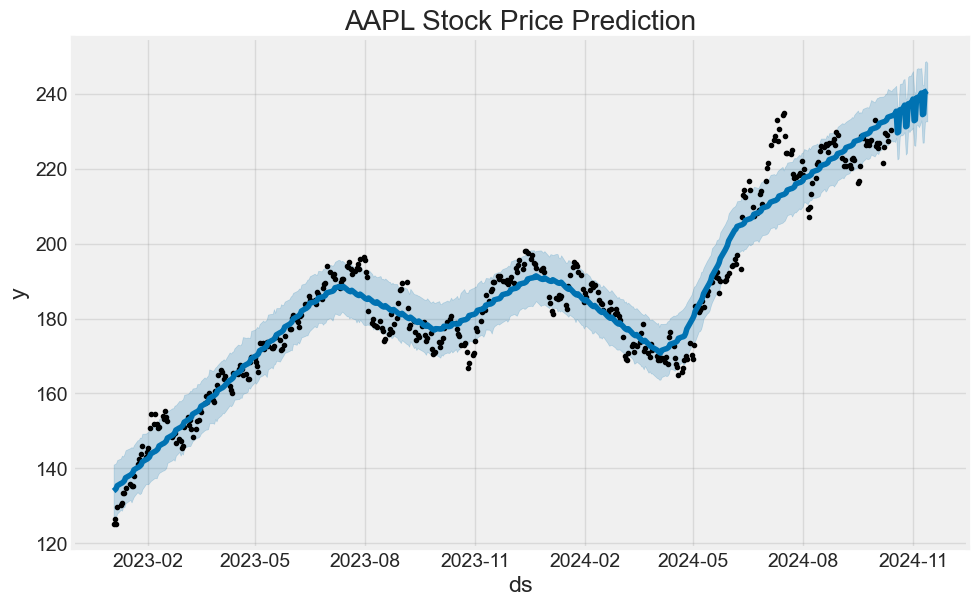

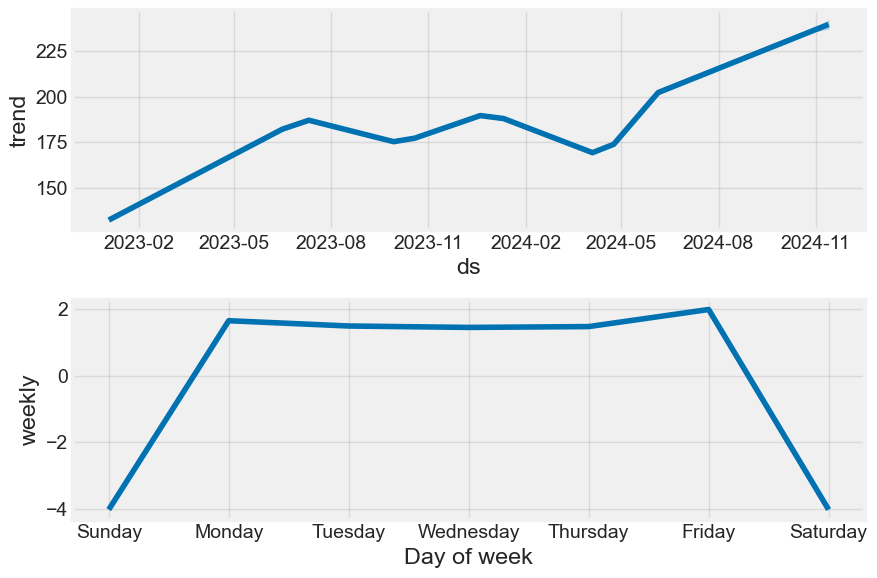

            ds        yhat  yhat_lower  yhat_upper
448 2024-10-15  234.213000  227.266517  241.275064
449 2024-10-16  234.402143  227.449074  241.515818
450 2024-10-17  234.658652  227.159880  241.851735
451 2024-10-18  235.402961  228.340369  242.202157
452 2024-10-19  229.626241  222.516430  236.627005
453 2024-10-20  229.857688  222.798837  236.622237
454 2024-10-21  235.760856  228.608954  242.655473
455 2024-10-22  235.833155  229.025023  242.768401
456 2024-10-23  236.022299  228.952260  242.790238
457 2024-10-24  236.278807  229.282753  243.828784
458 2024-10-25  237.023116  229.845417  244.014431
459 2024-10-26  231.246396  223.814118  238.767638
460 2024-10-27  231.477844  224.289529  238.834167
461 2024-10-28  237.381011  230.523767  244.558715
462 2024-10-29  237.453311  229.796455  244.890284
463 2024-10-30  237.642454  230.371436  244.753223
464 2024-10-31  237.898962  230.519270  245.489679
465 2024-11-01  238.643271  231.024871  246.105300
466 2024-11-02  232.866552  226

In [34]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Download stock data
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2024-11-14")

# Prepare data for Prophet
df = data.reset_index()[["Date", "Close"]]
df.columns = ["ds", "y"]

# Create and fit the model
model = Prophet()
model.fit(df)

# Make future dataframe for predictions
future = model.make_future_dataframe(periods=30)  # Predict 30 days into the future

# Make predictions
forecast = model.predict(future)

# Plot the results
fig1 = model.plot(forecast)
plt.title(f"{ticker} Stock Price Prediction")
plt.show()

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

# Print the predicted values for the next 30 days
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(30))

not run

In [35]:
import yfinance as yf

# Replace with the stock symbol you're using
symbol = "TATAMOTORS.NS"
data = yf.download(symbol, start="2024-10-14", end="2024-11-15")
print(data.head())

[*********************100%%**********************]  1 of 1 completed

             Open   High         Low   Close  Adj Close   Volume
Date                                                            
2024-10-14  930.0  940.0  925.349976  928.25     928.25  5739474


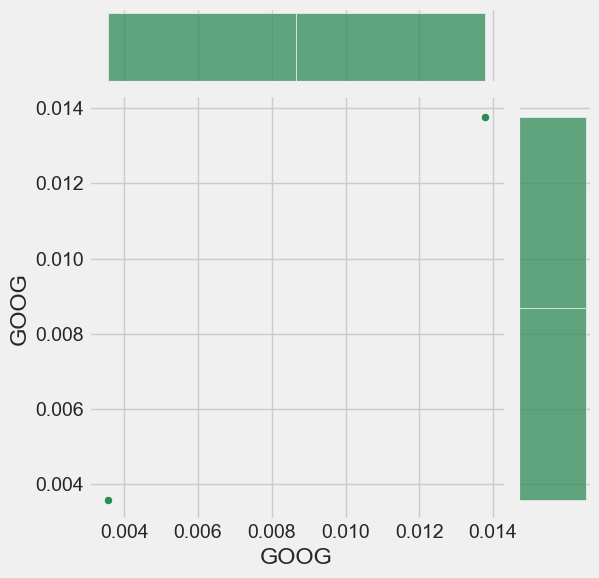

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

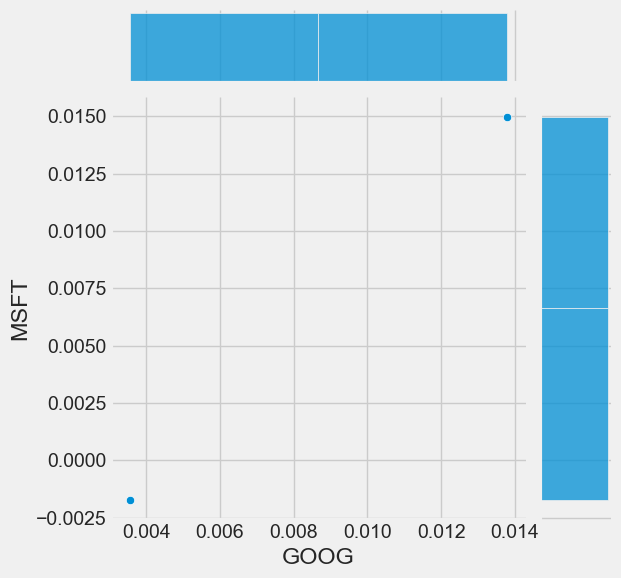

In [17]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

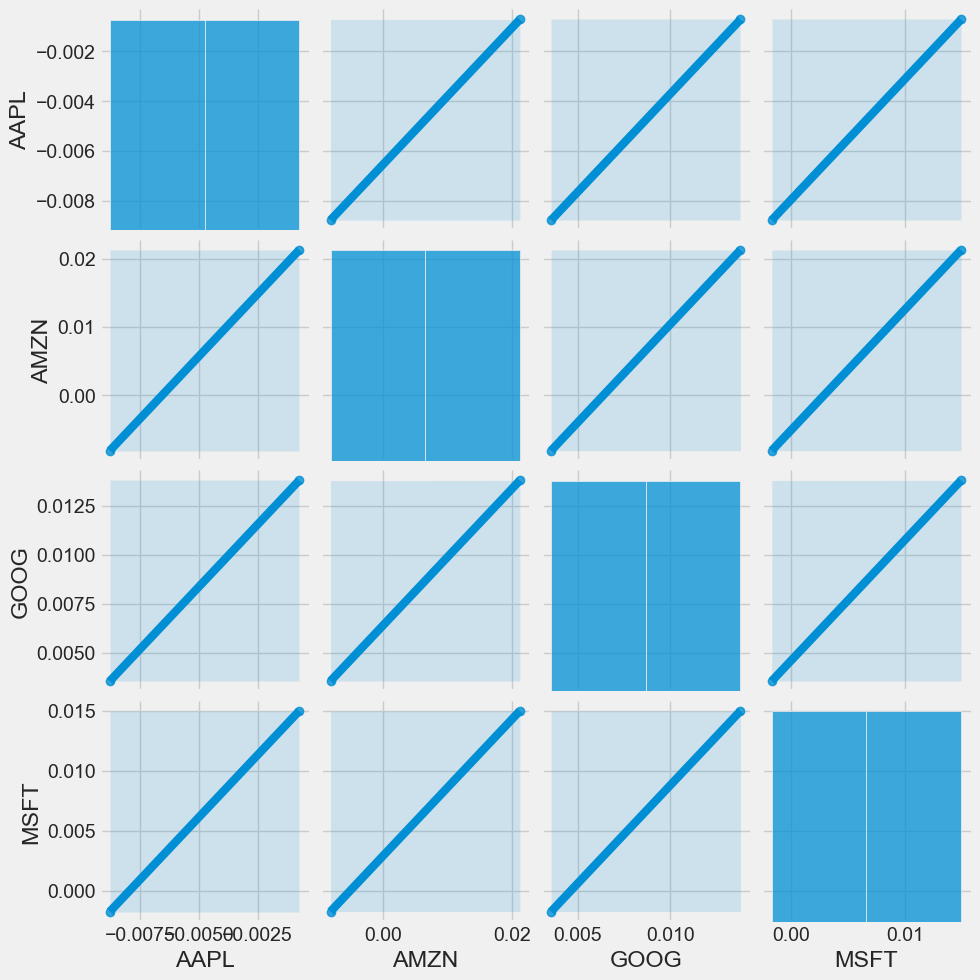

In [18]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

e:\stockprice\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


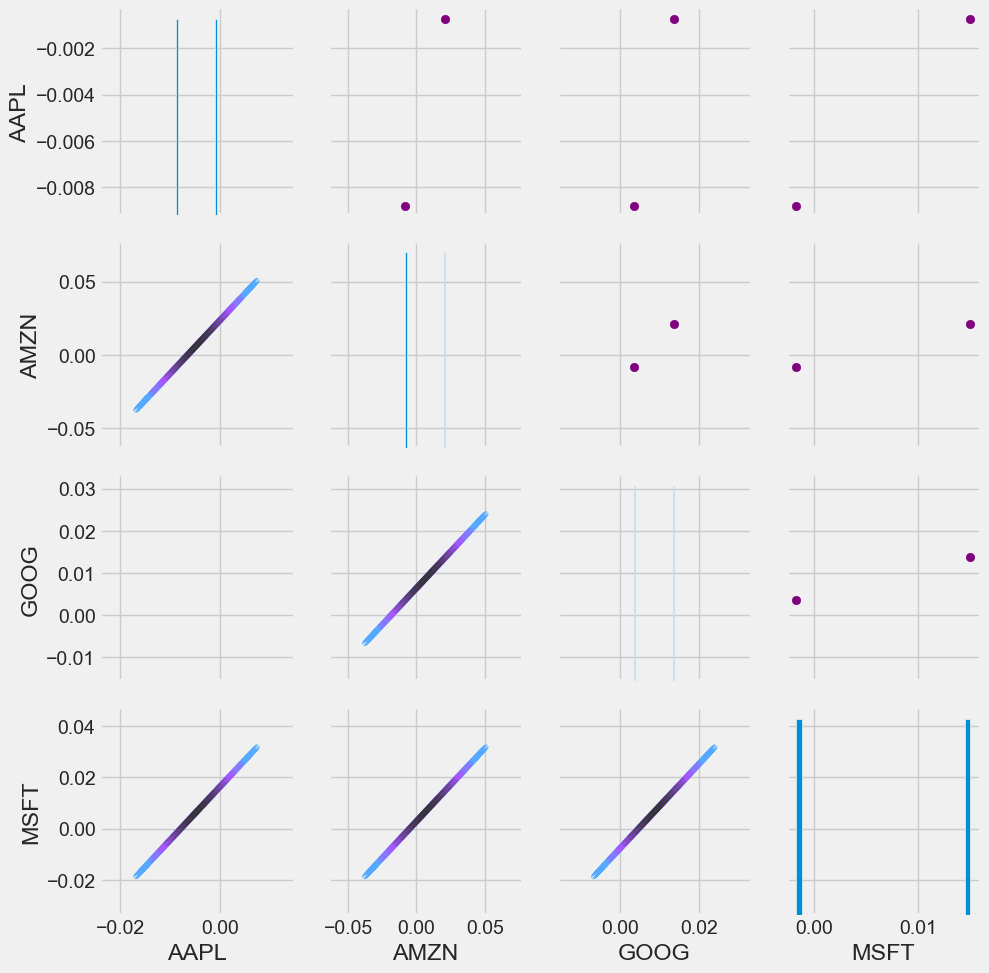

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

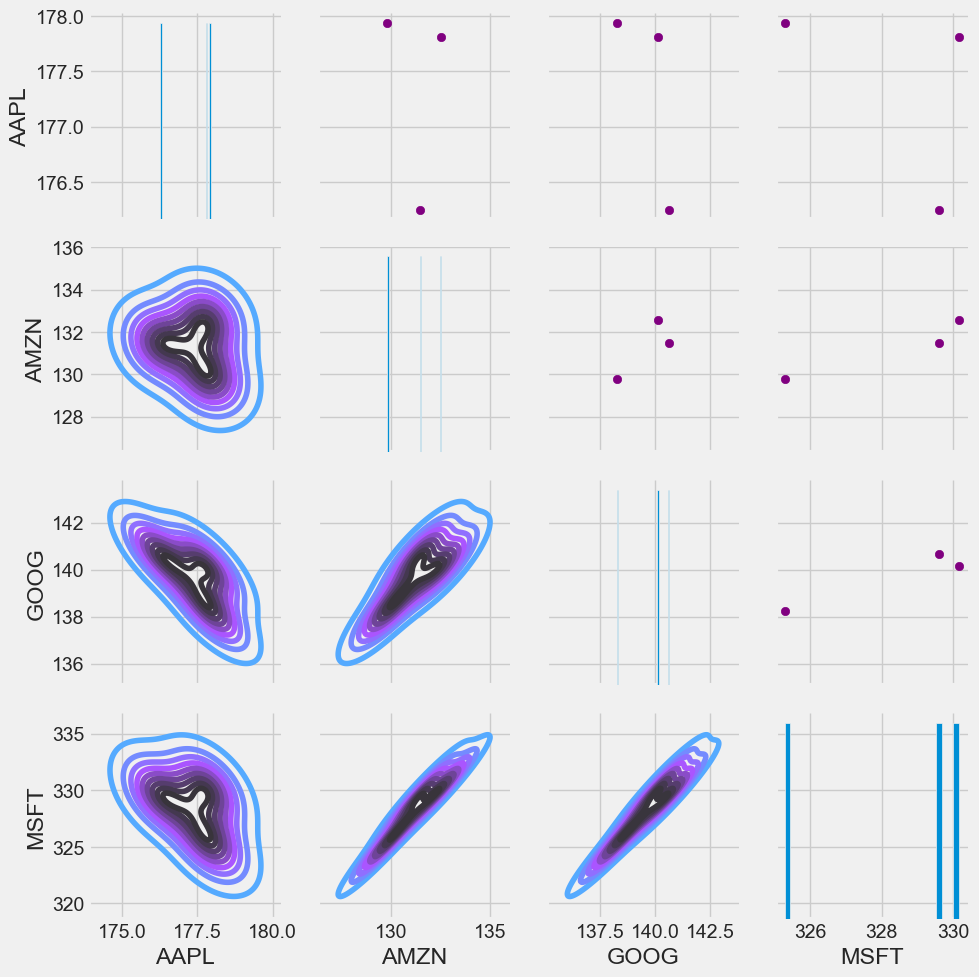

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

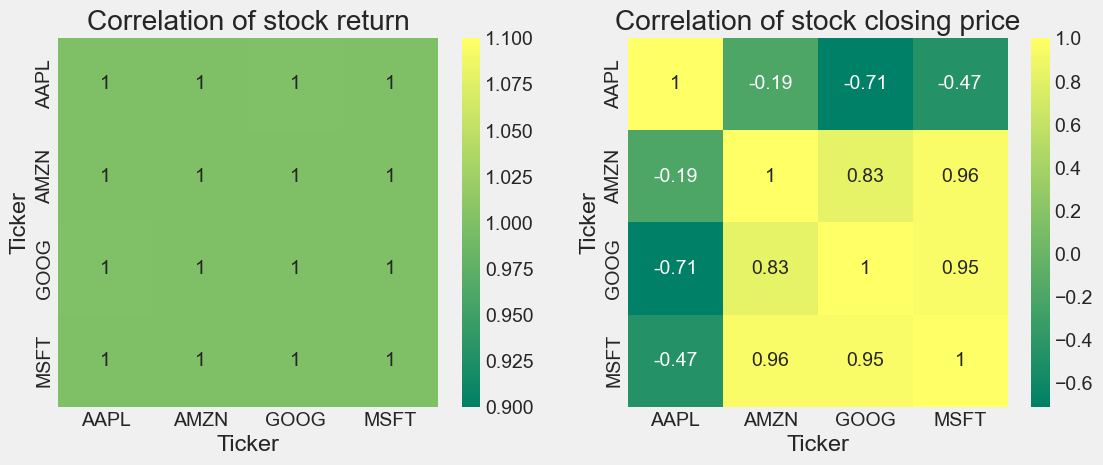

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

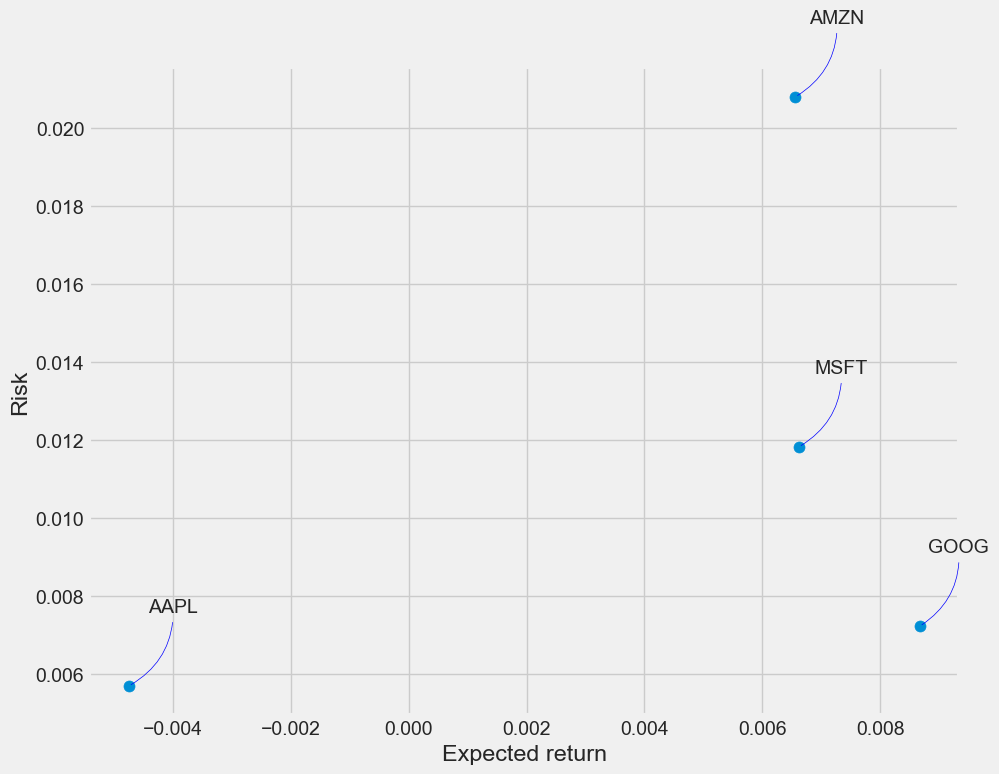

In [22]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [25]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Set the start and end dates
start_date = '2018-01-01'
end_date = datetime.now()

# Fetch the stock data for Apple (AAPL) using yfinance
df = yf.download('AAPL', start=start_date, end=end_date)

# Display the data
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568928,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561863,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750275,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214233,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061142,82271200
...,...,...,...,...,...,...
2024-10-08,224.300003,225.979996,223.250000,225.770004,225.770004,31855700
2024-10-09,225.229996,229.750000,224.830002,229.539993,229.539993,33591100
2024-10-10,227.779999,229.500000,227.169998,229.039993,229.039993,28183500


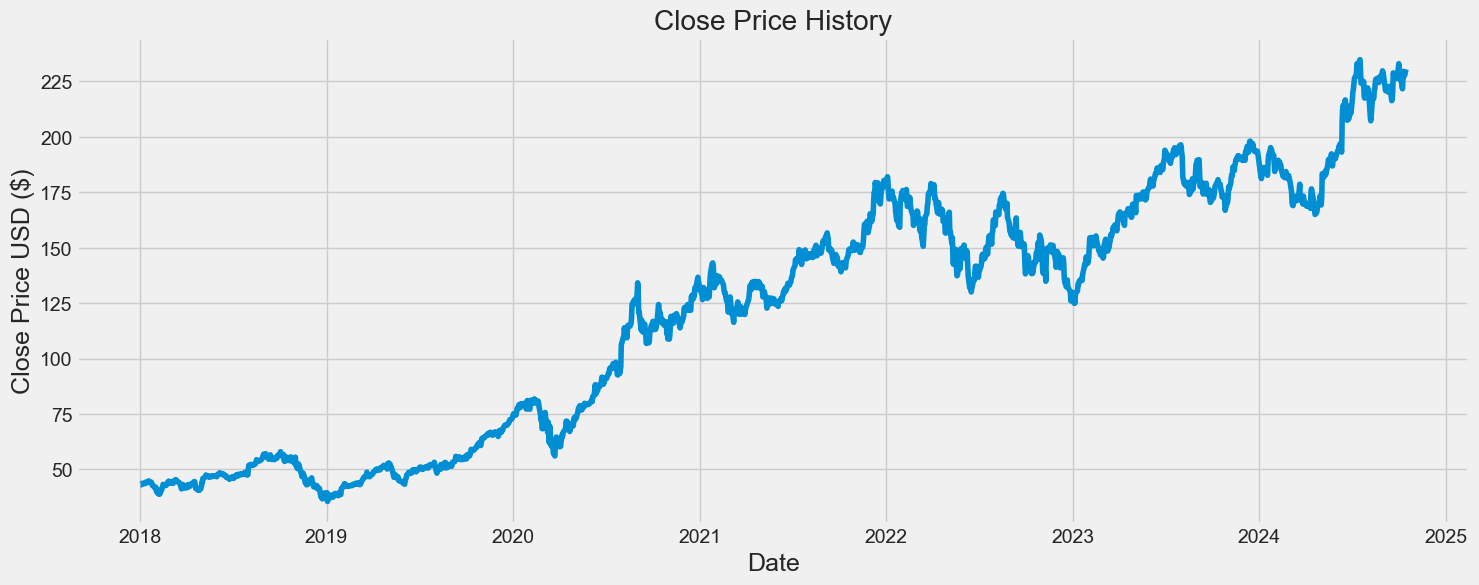

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1622

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03772471],
       [0.03768708],
       [0.03869073],
       ...,
       [0.97099442],
       [0.96351727],
       [0.9780531 ]])

In [29]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03772471, 0.03768708, 0.03869073, 0.04116222, 0.04034676,
       0.04032167, 0.04027147, 0.0415135 , 0.04378426, 0.04265516,
       0.04630594, 0.04650666, 0.04550302, 0.04367135, 0.04372152,
       0.04018367, 0.03628197, 0.03678379, 0.03233011, 0.03108808,
       0.03166517, 0.03210427, 0.02297105, 0.01794026, 0.0261451 ,
       0.02176666, 0.01625913, 0.01783989, 0.02574365, 0.02778857,
       0.0315899 , 0.03864056, 0.03793799, 0.03721036, 0.0362318 ,
       0.03802581, 0.0417895 , 0.04614284, 0.04541519, 0.04507645,
       0.04116222, 0.04268025, 0.04344554, 0.04325734, 0.04119986,
       0.04359608, 0.04740994, 0.04959289, 0.0473974 , 0.04547792,
       0.04574137, 0.04495101, 0.0415386 , 0.04146333, 0.03648271,
       0.03344667, 0.02854132, 0.03836455, 0.03280683, 0.03047334])]
[0.03210427364000967]

[array([0.03772471, 0.03768708, 0.03869073, 0.04116222, 0.04034676,
       0.04032167, 0.04027147, 0.0415135 , 0.04378426, 0.04265516,
       0.04630594, 0.04650666, 0.04

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

e:\stockprice\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - loss: 0.0036


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step


11.80794671366038

C:\Users\TUF\AppData\Local\Temp\ipykernel_7676\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


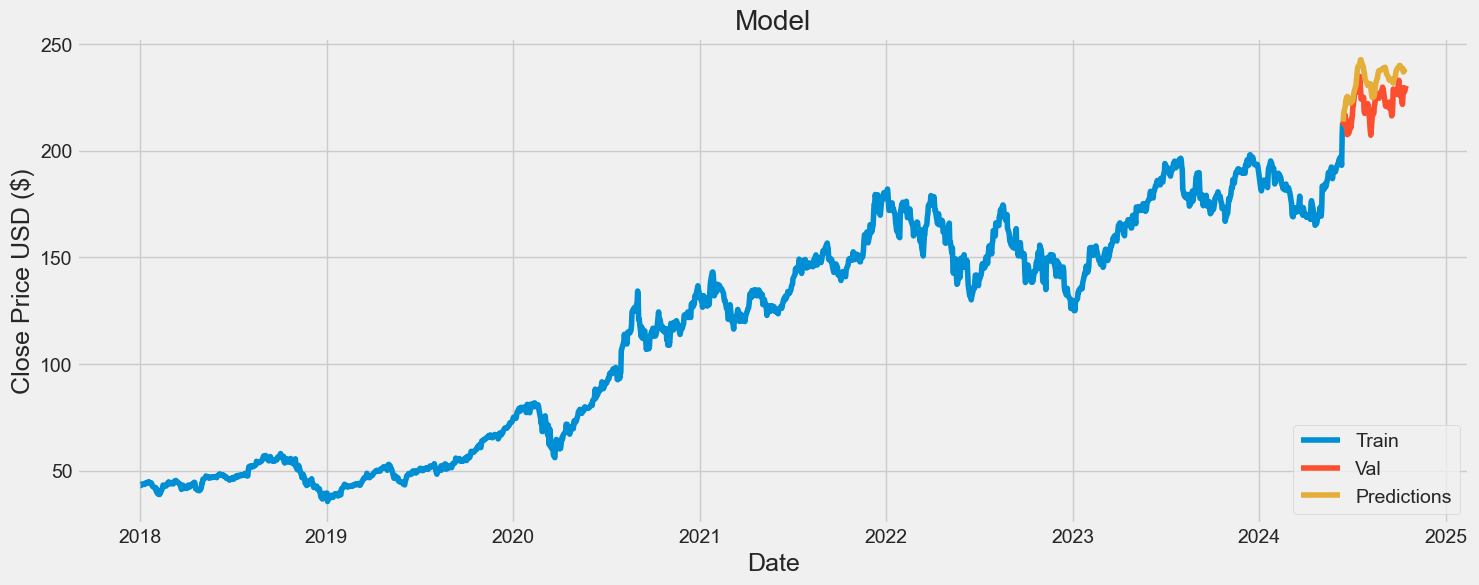

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-05-03,183.380005,177.618195
2024-05-06,181.710007,179.716873
2024-05-07,182.399994,182.014694
2024-05-08,182.740005,184.217957
2024-05-09,184.570007,186.113083
...,...,...
2024-08-26,227.179993,232.354782
2024-08-27,228.029999,232.677399
2024-08-28,226.490005,233.045944
